In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

In [2]:
test_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/test.csv')

test_df.shape

(334, 22)

In [3]:
train_df = pd.read_csv('/Users/mahmoud/Documents/Project_3/train.csv')

train_df.shape

(2999, 22)

In [4]:
test_df = test_df.drop(columns=['Unnamed: 0'])
train_df = train_df.drop(columns=['Unnamed: 0'])

In [5]:
X = train_df.drop(['churn'], axis = 1)
y = train_df['churn']

In [6]:
y.value_counts(normalize = True)

False    0.856619
True     0.143381
Name: churn, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import set_config
set_config(display='diagram')

In [9]:
# numeric columns + drop phone #
X_tr_num = X_train.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)
X_tr_num

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
93,142,0,140.8,140,23.94,228.6,119,19.43,152.9,88,6.88,10.9,7,2.94,1
419,135,0,201.8,81,34.31,225.0,114,19.13,204.4,82,9.20,10.3,6,2.78,1
2907,134,32,216.8,78,36.86,102.2,111,8.69,174.0,83,7.83,8.6,2,2.32,0
2525,103,36,87.2,92,14.82,169.3,110,14.39,166.7,80,7.50,10.9,5,2.94,6
2592,92,29,201.3,130,34.22,203.7,115,17.31,129.9,113,5.85,6.4,6,1.73,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,65,29,158.1,104,26.88,322.2,81,27.39,210.0,96,9.45,8.9,6,2.40,1
683,55,25,165.6,123,28.15,136.1,95,11.57,175.7,90,7.91,11.0,2,2.97,3
2688,103,0,246.5,47,41.91,195.5,84,16.62,200.5,96,9.02,11.7,4,3.16,1
2687,80,0,189.1,122,32.15,223.2,92,18.97,269.0,116,12.11,13.9,3,3.75,2


In [10]:
# doing the same for X test
X_te_num = X_test.drop(['state', 'area code', 'phone number', 'international plan', 'voice mail plan'], axis=1)

# Logistic Reg

In [36]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# without smote much better

steps = [('std_scaler', StandardScaler()), ('smote', SMOTE()), ('lg', LogisticRegression())]
model_pipe = Pipeline(steps)

In [37]:
model_pipe

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('lg', LogisticRegression())])

In [38]:
model_pipe.fit(X_tr_num, y_train);

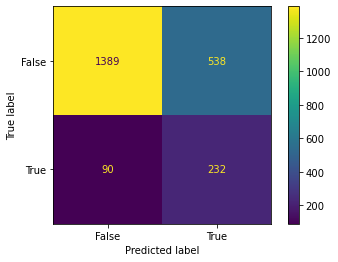

In [39]:
plot_confusion_matrix(model_pipe,X_tr_num,y_train)

In [40]:
print(model_pipe.score(X_tr_num, y_train))

0.7207647843485994


In [41]:
print(model_pipe.score(X_te_num, y_test))

0.708


# Random Forest best model

In [17]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# without smote better here

steps = [('std_scaler', StandardScaler()),
        ('rf_clf', RandomForestClassifier(random_state=42))]

pipeline = Pipeline(steps)


pipeline

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf_clf', RandomForestClassifier(random_state=42))])

In [18]:
pipe_grid = {
    'rf_clf__n_estimators': [25, 50, 100, 150],
    'rf_clf__max_features': ['sqrt', 'log2', None],
    'rf_clf__max_depth': [3, 6, 9, None],
    'rf_clf__max_leaf_nodes': [3, 6, 9]}

gs_pipe = GridSearchCV(estimator = pipeline,
                      param_grid = pipe_grid)

In [19]:
gs_pipe.fit(X_tr_num, y_train)

GridSearchCV(estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('rf_clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'rf_clf__max_depth': [3, 6, 9, None],
                         'rf_clf__max_features': ['sqrt', 'log2', None],
                         'rf_clf__max_leaf_nodes': [3, 6, 9],
                         'rf_clf__n_estimators': [25, 50, 100, 150]})

In [20]:
gs_pipe.best_score_

0.9123999010146002

In [21]:
# takes best estimators and puts in the variable called
best_model = gs_pipe.best_estimator_
best_model

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf_clf',
                 RandomForestClassifier(max_depth=6, max_features=None,
                                        max_leaf_nodes=9, n_estimators=150,
                                        random_state=42))])

In [22]:
y_pred = best_model.predict(X_te_num)

# Comparison

In [47]:
best_model.__class__.__name__

'Pipeline'

In [48]:
# since both are pipeline, we will look at the 1st element to see if it is Logisitic reg or random forest
for i,x in enumerate(models):
    print(x)

Pipeline(steps=[('std_scaler', StandardScaler()), ('smote', SMOTE()),
                ('lg', LogisticRegression())])
Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf_clf',
                 RandomForestClassifier(max_depth=6, max_features=None,
                                        max_leaf_nodes=9, n_estimators=150,
                                        random_state=42))])


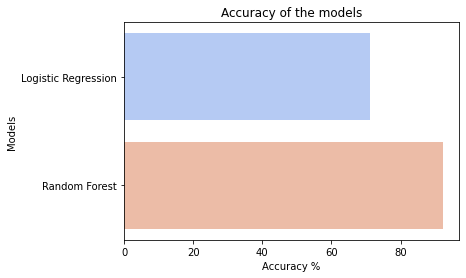

In [46]:
from sklearn.metrics import accuracy_score

models = [model_pipe, best_model]

results = pd.DataFrame(columns=["Models", "Accuracy"])

for i,model in enumerate(models):
  
    if i == 1:
        names = "Random Forest"
    else:
        names = 'Logistic Regression'
    y_pred = model.predict(X_te_num)
    accuracy = accuracy_score(y_test, y_pred) * 100
    result = pd.DataFrame([[names, accuracy]], columns=["Models", "Accuracy"])
    results = results.append(result, ignore_index=True)

sns.barplot(x='Accuracy', y='Models', data=results, palette="coolwarm")
plt.xlabel('Accuracy %')

plt.title('Accuracy of the models')

plt.show()